In [1]:
import numpy as np
import pymc as pm
import xarray as xr
import arviz as az

In [2]:
from bayesian_models import DirichletHyperpriorModel, BayesianModel, SimpleFractionModel
from data_tasks import SimpleSyntheticTask
from confusion_matrix import BinaryCM

/home/erik/miniconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/torch/cuda/__init__.py:88: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
bm = DirichletHyperpriorModel(SimpleSyntheticTask)
idata = bm.trace()

/home/erik/miniconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/pymc/data.py:640: FutureWarning: The `mutable` kwarg was not specified. Currently it defaults to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default will change to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Set `pm.Data(..., mutable=False/True)`, or use `pm.ConstantData`/`pm.MutableData`.
  warnings.warn(
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (8 chains in 8 jobs)
NUTS: [hyperprior, prior_class_0, prior_class_1, prior_class_2, prior_class_3, prior_class_4, prior_class_5, prior_class_6, prior_class_7, prior_class_8, prior_class_9]


Sampling 8 chains for 1_000 tune and 100 draw iterations (8_000 + 800 draws total) took 42 seconds.
/home/erik/miniconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/pymc/backends/arviz.py:57: UserWarning: Could not extract data from symbolic observation likelihood_class_0
  warnings.warn(f"Could not extract data from symbolic observation {obs}")
/home/erik/miniconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/pymc/backends/arviz.py:57: UserWarning: Could not extract data from symbolic observation likelihood_class_1
  warnings.warn(f"Could not extract data from symbolic observation {obs}")
/home/erik/miniconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/pymc/backends/arviz.py:57: UserWarning: Could not extract data from symbolic observation likelihood_class_2
  warnings.warn(f"Could not extract data from symbolic observation {obs}")
/home/erik/miniconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/pymc/backends/arviz.py:57: UserWarning: Could not extract data from symboli

/home/erik/miniconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/arviz/plots/plot_utils.py:271: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (44) in plot_posterior, generating only 40 plots
  warnings.warn(


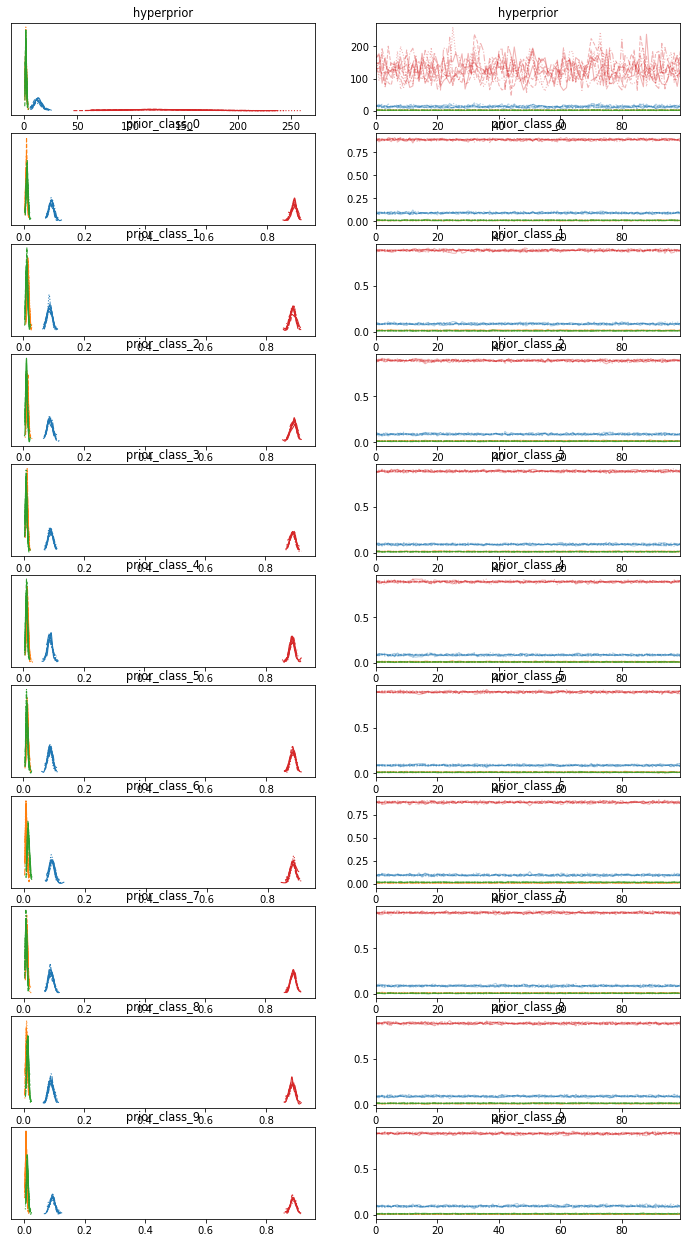

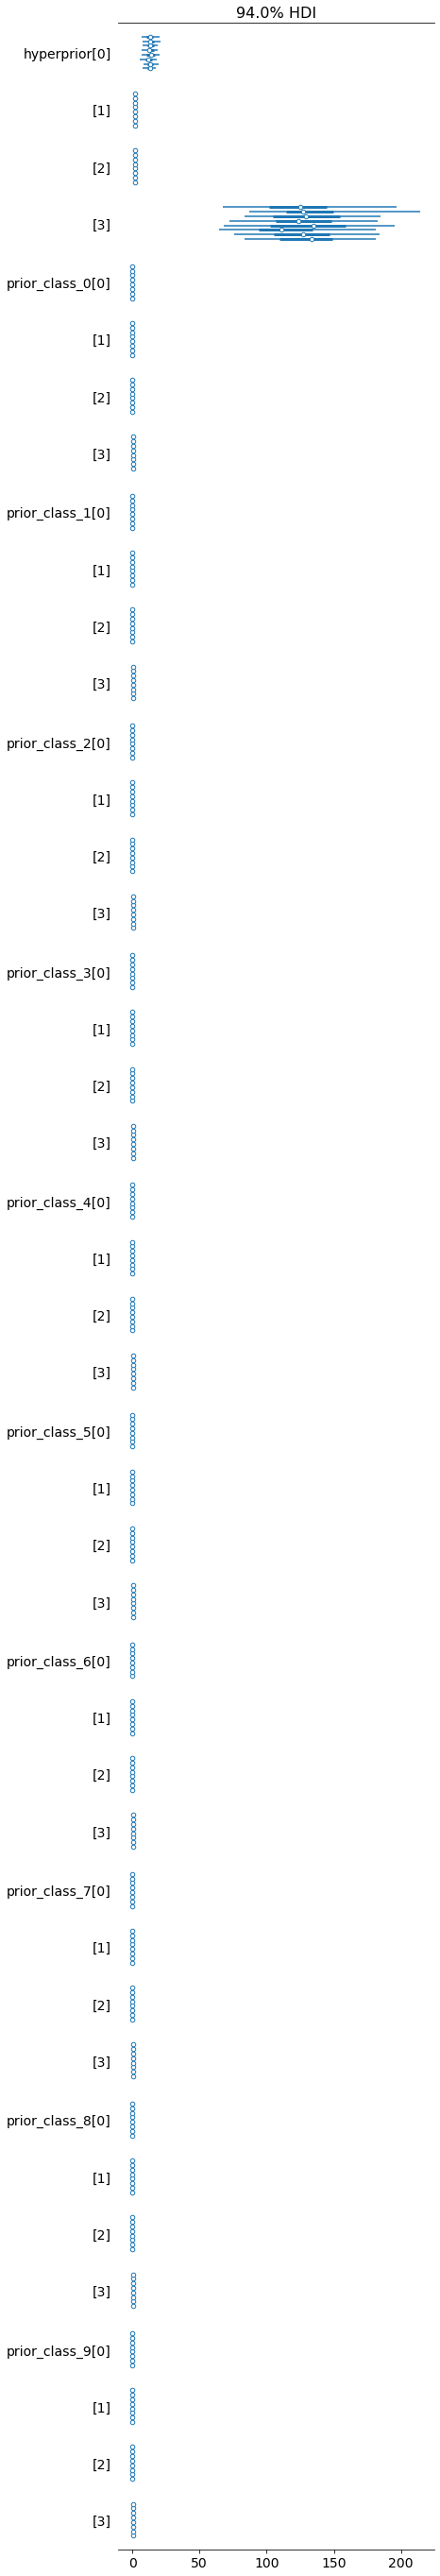

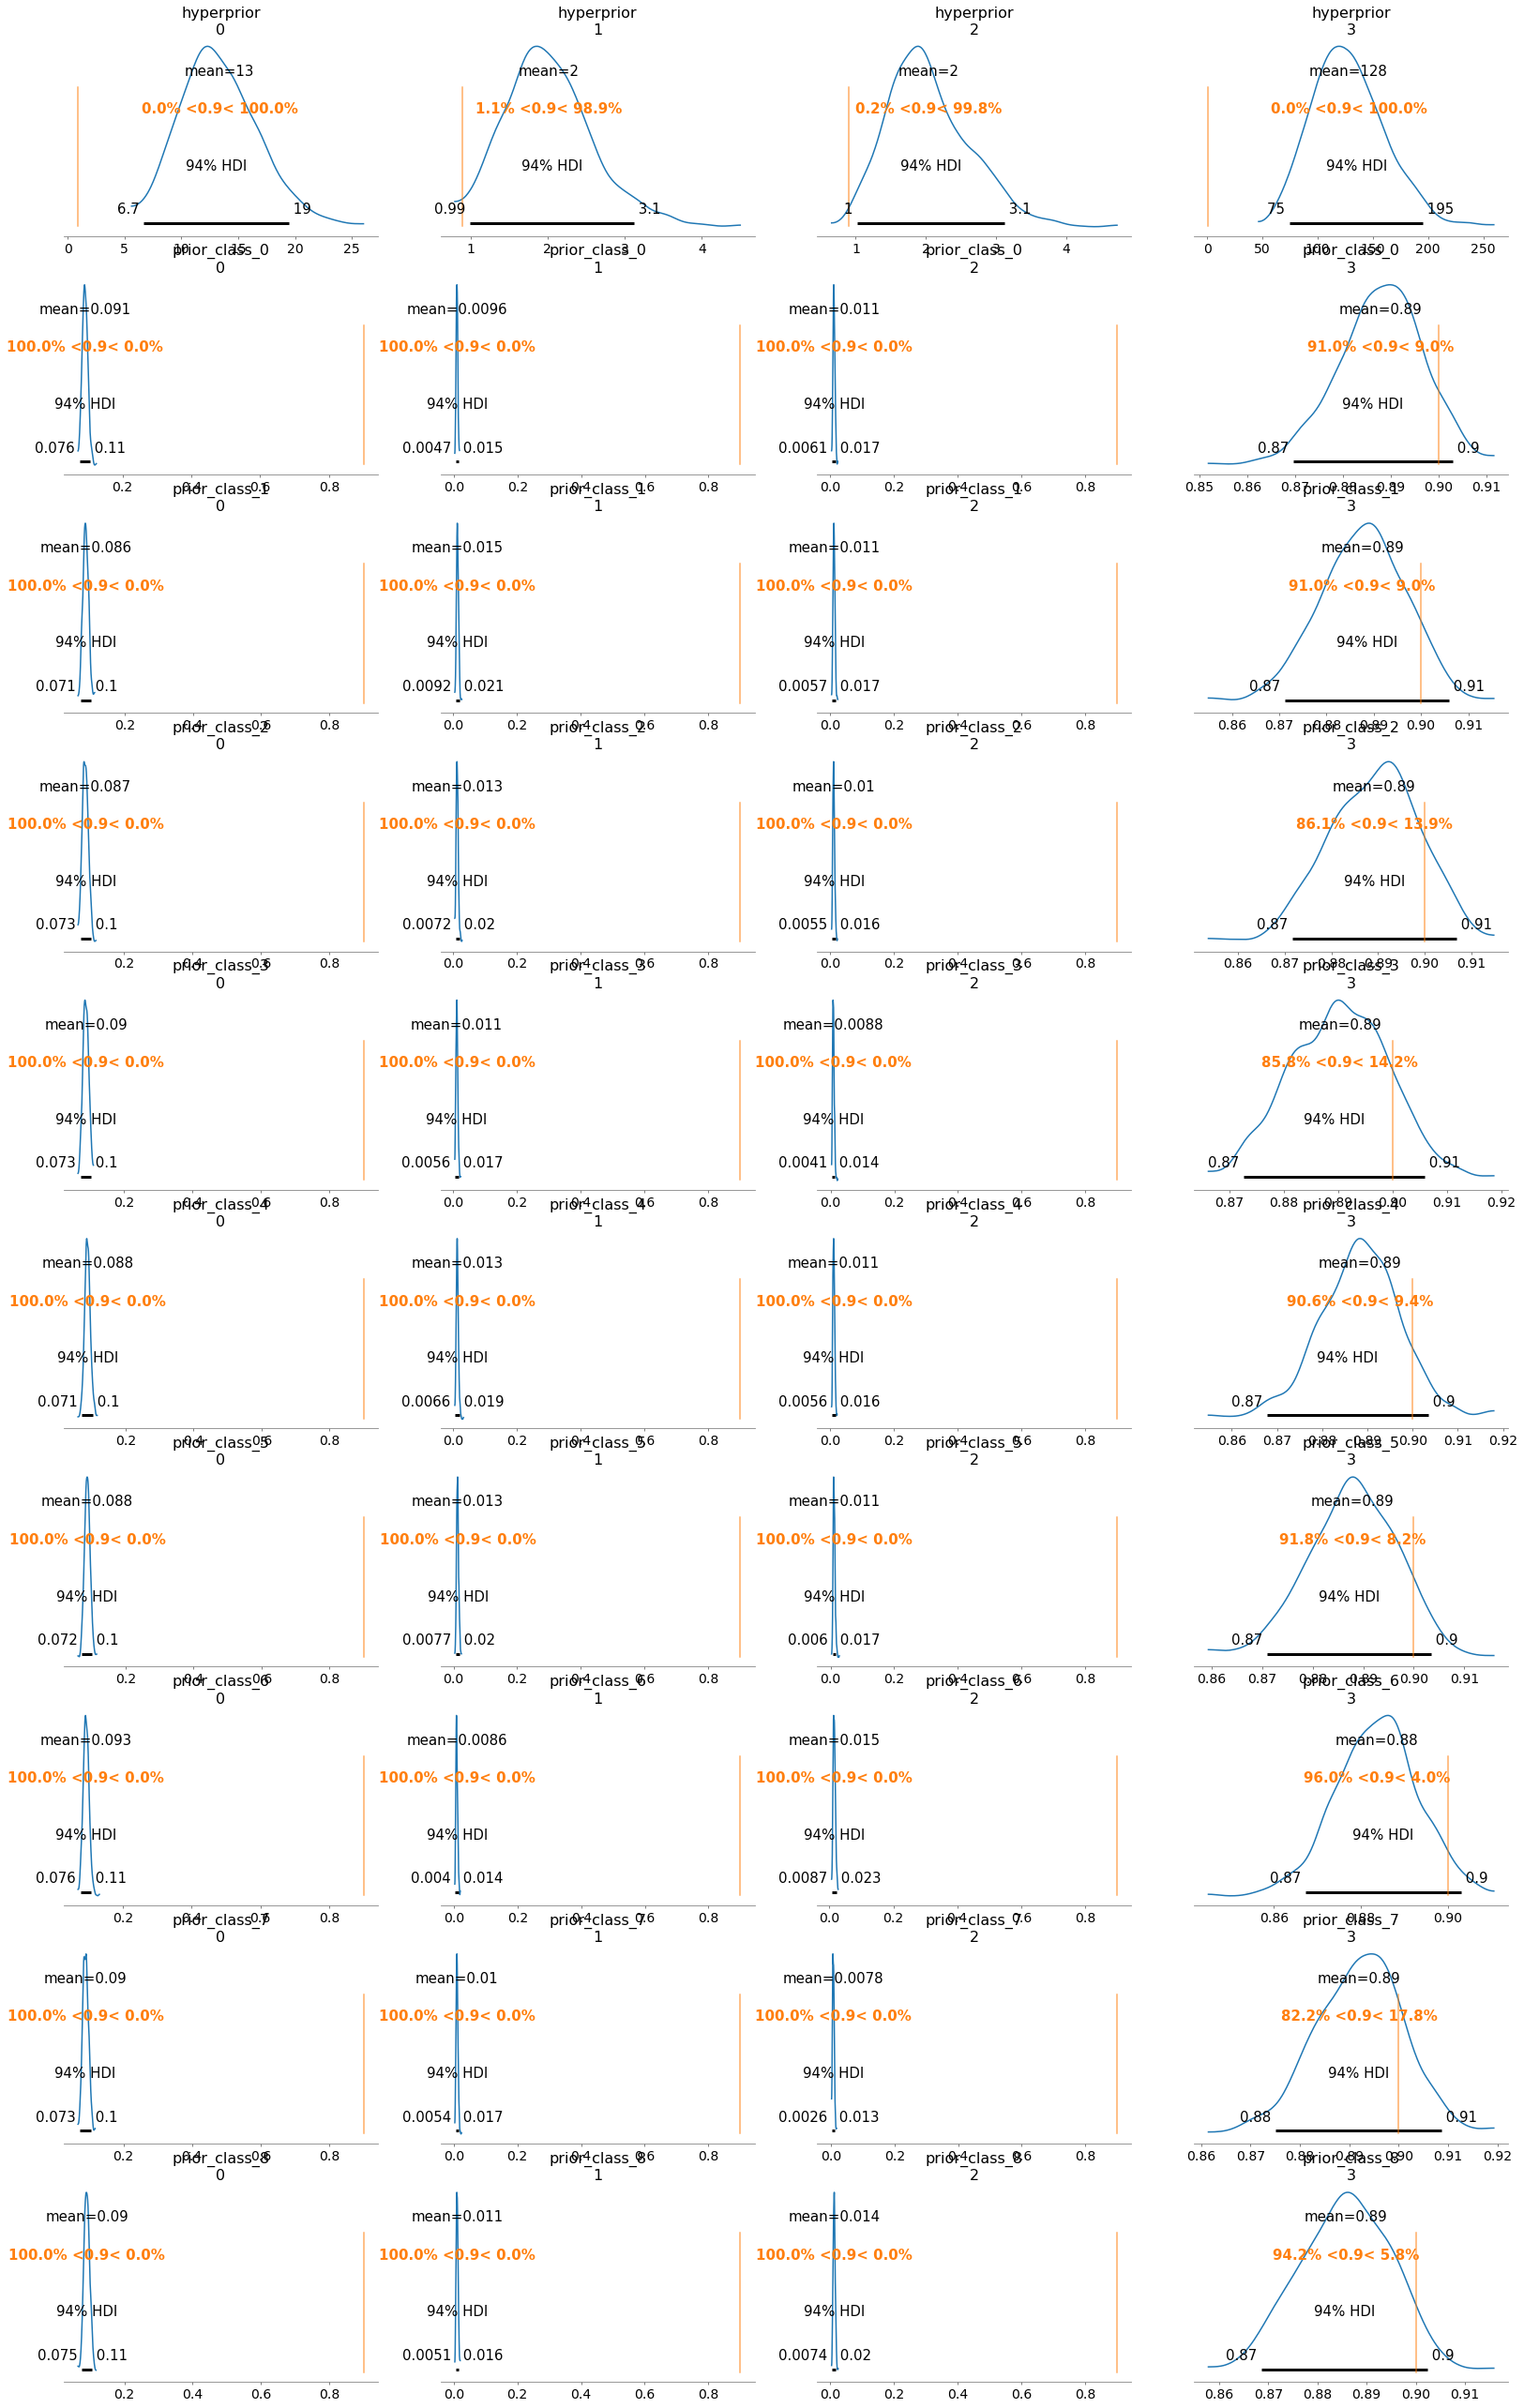

In [4]:
az.summary(idata)

# %%
az.plot_trace(idata)

# %%
az.plot_forest(idata)

# %%
az.plot_posterior(idata, ref_val=0.9);

/home/erik/miniconda3/envs/pymc-dev-py39/lib/python3.9/site-packages/arviz/plots/backends/matplotlib/pairplot.py:238: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


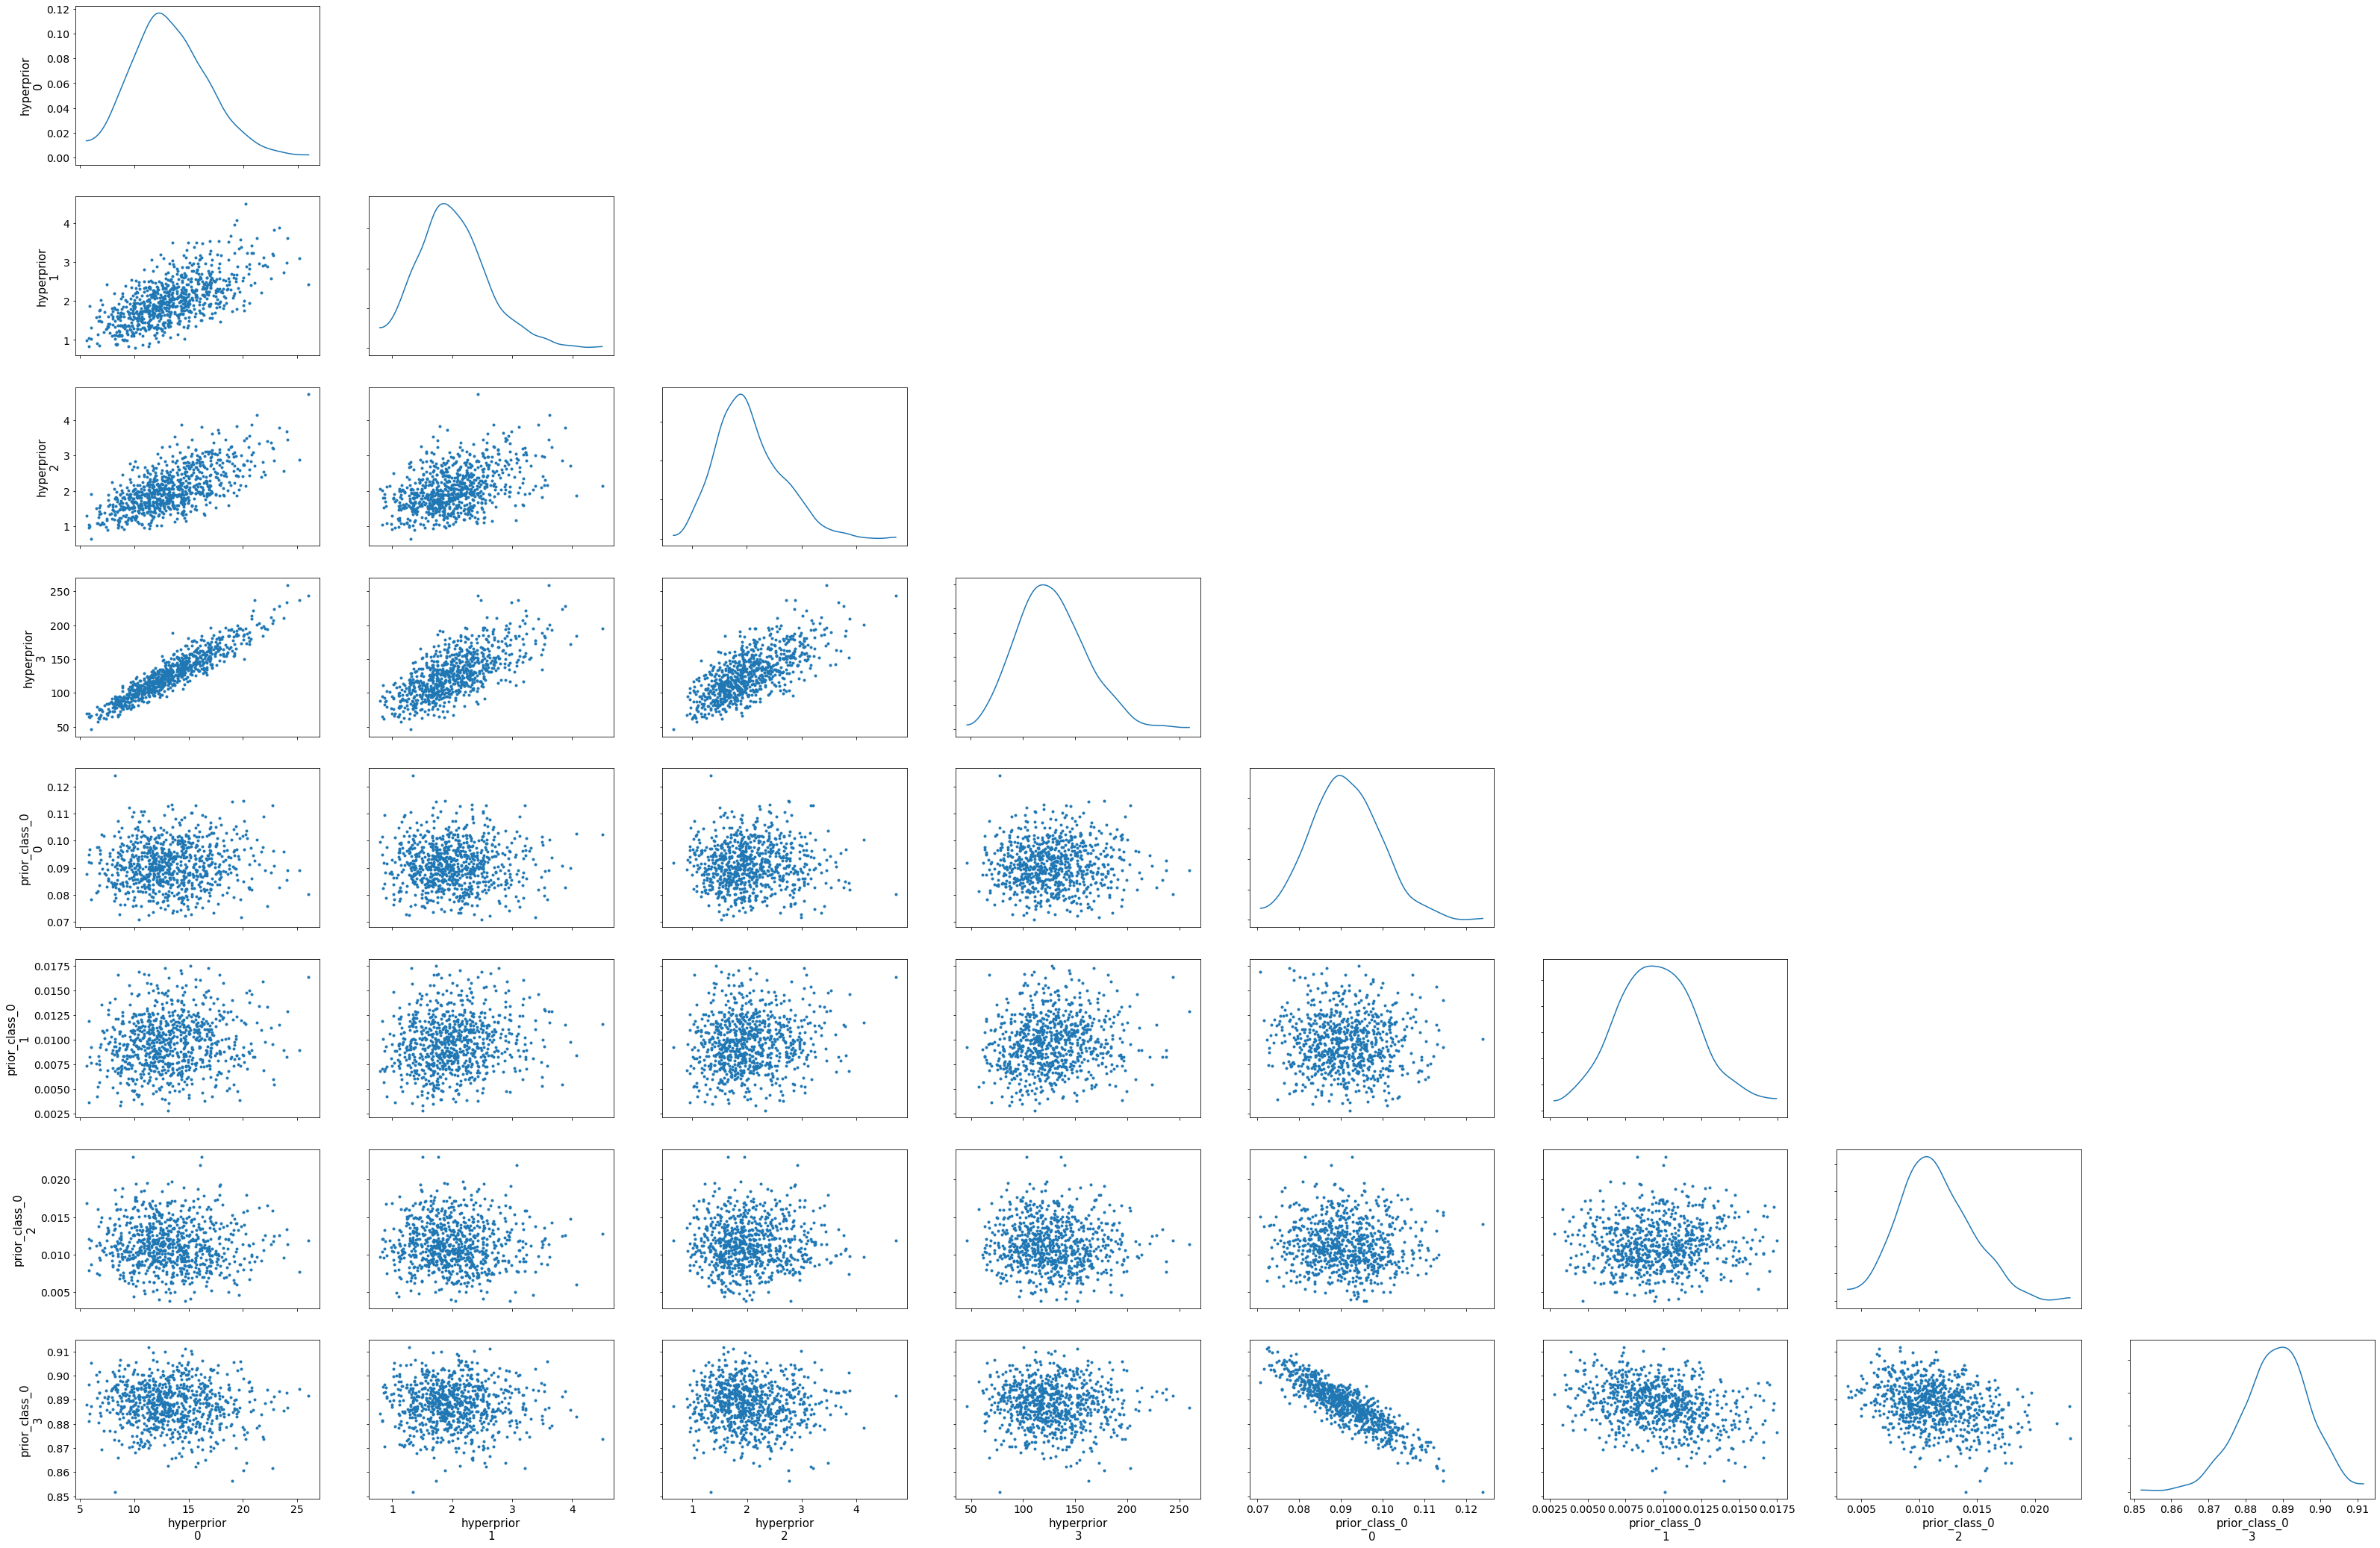

In [5]:
az.plot_pair(idata, marginals=True);

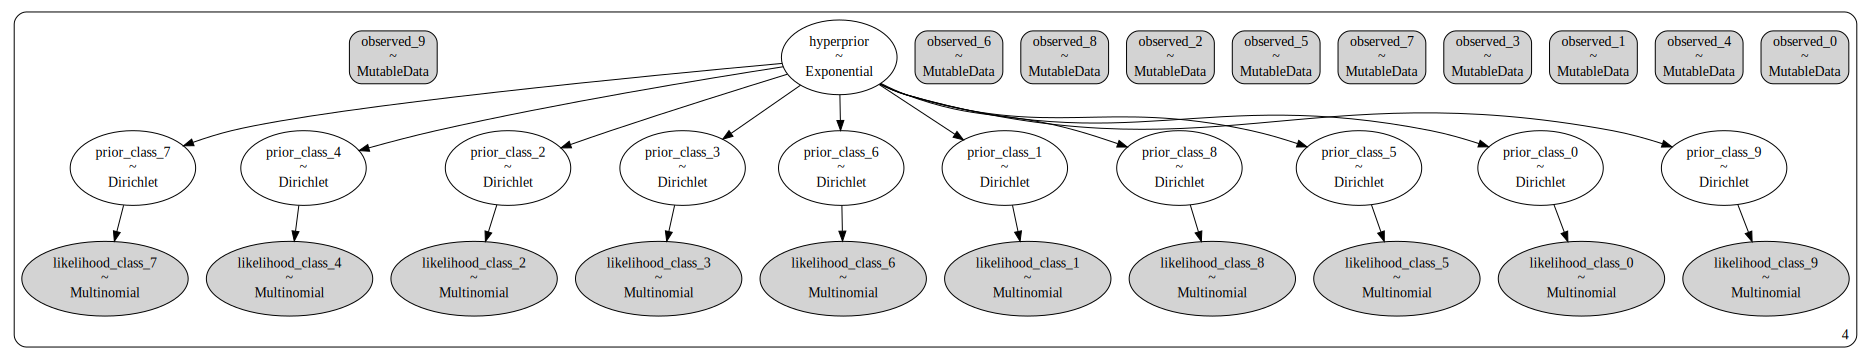

In [6]:
pm.model_to_graphviz(bm._model)

In [7]:
from typing import List


class BetaHyperpriorModel(BayesianModel):
    @classmethod
    def name(cls):
        return "beta_hyperprior_model"
    
    @classmethod
    def build_model(cls, observed_cms: List[BinaryCM]):
        

IndentationError: expected an indented block (3821169699.py, line 11)

In [ ]:
with pm.Model() as model:
    # Hyperprior inspired by
    # https://bayesball.github.io/BOOK/bayesian-hierarchical-modeling.html
    mu = pm.Beta('mu', alpha=1, beta=1)
    eta = pm.Exponential('eta', 1/100)
    alpha =pm.Deterministic('alpha', mu * eta)
    beta = pm.Deterministic('beta', (1 - mu) * eta)

    # Define the prior.
    p_tp = pm.Beta('p_tp', alpha=alpha, beta=beta, shape=100)

    # Define the likelihood.
    likelihood = pm.Binomial('likelihood', n=n, p=p_tp, observed=detections)

    # Fit the model.
    idata = pm.sample(draws=4000, tune=2000)